<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP417_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/CAP4213-Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Computational Statistics

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)

These code was provide for [this](https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A05.ipynb) class exercice. 




# Exercice 4 - Pratical

Consider the small image dataset presented [here](https://github.com/vsantjr/CAP/tree/master/CAP417/Images). In order to solve this exercise, you need to:

* Read/open the images. There are several ways to do it (in Python, in other programming languages);
* Select image features. Image features are important to represent each image. Select at least two of these features.


Develop a program in order to:

1. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;
2. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?
3. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


Deadline: 12 may 2022


IMPORTANT: The last date to finish and send all the exercises is 12 may 2022.

## $\bullet$  Read/open the images 📥📦

In [1]:
!wget 'https://github.com/vsantjr/CAP/blob/master/CAP417/Images/imgsmall.zip?raw=true'
#import zipfile 
!unzip "/content/imgsmall.zip?raw=true" -d "/content/image"

In [2]:
#Reading and allocating all figures names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('/content/image'):
    f.extend(filenames)
    break
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

I will use the same code used on [CAP 421 - Deep Leaning](https://github.com/barauna-lo/Deep-Learning/blob/main/AT1_CAP_421_Image_processing_basics_barauna_lo.ipynb) classes for read and print the image. For praticing we can use three librarys. But for all the exercice we will use only `openCv`

In [3]:
#Import cv2 libary 
import cv2
#Reading all imagens on the 'image' folder
img = []
for i in range(len(f)):
  filename = '/content/image/'+f[i] #Alocating image name
  #Append a reshaped image readead for `imread` 
  img.append(cv2.resize(cv2.imread(filename), (100,100)))

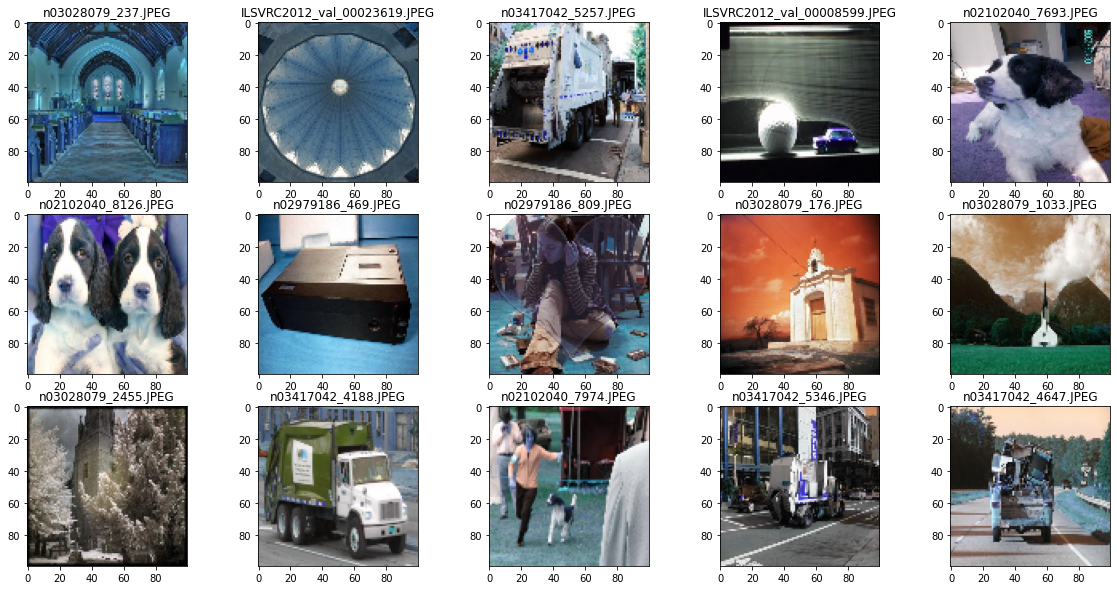

In [4]:
#Lets take a look on the imagens
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(img[i])#, cmap = 'gray')
  plt.title(f[i])
plt.show()

## $\bullet$ Select image features. 
Image features are important to represent each image. Select at least two of these features.

We will extract all colors features, gray scale and edges.

https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04 

In [5]:
import numpy as np
#Reading all imagens on the 'image' folder
img_red  = []
img_gree = []
img_feat = []
img_blue = []
img_gray = []
img_edges= []
for i in range(len(f)):
  #Taking Collors
  colors = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
  (R,G,B) = cv2.split(colors)
  img_red.append(R)
  img_gree.append(G)
  img_blue.append(B)
  #Gray Scale
  gray = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)
  img_gray.append(gray)
  # GaussianBlur to reduce the noise in the image
  blur = cv2.GaussianBlur(img_gray[i],(3,3), 0)
  # extract edges
  img_edges.append(cv2.Sobel(blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5))        

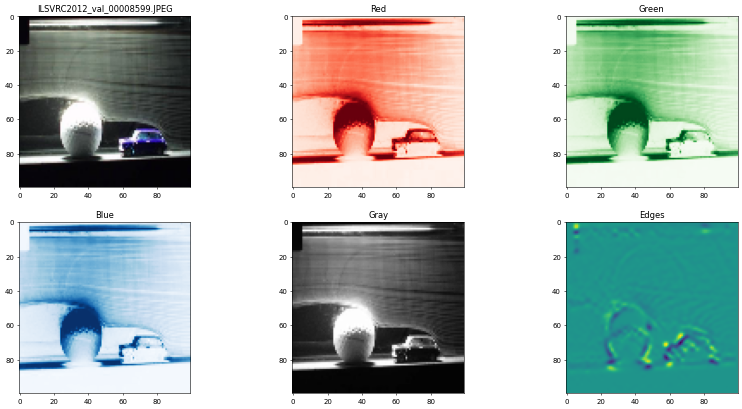

In [6]:
plt.figure(figsize=(20,10),dpi=50)
i=3

plt.subplot(2,3,1)
plt.imshow(img[i])
plt.title(f[i])
plt.subplot(2,3,2)
plt.imshow(img_red[i], cmap = 'Reds')
plt.title('Red')
plt.subplot(2,3,3)
plt.imshow(img_gree[i], cmap = 'Greens')
plt.title('Green')
plt.subplot(2,3,4)
plt.imshow(img_blue[i], cmap = 'Blues')
plt.title('Blue')
plt.subplot(2,3,5)
plt.imshow(img_gray[i], cmap = 'gray')
plt.title('Gray')
plt.subplot(2,3,6)
plt.imshow(img_edges[i])#, cmap = 'Reds')
plt.title('Edges')


plt.show()

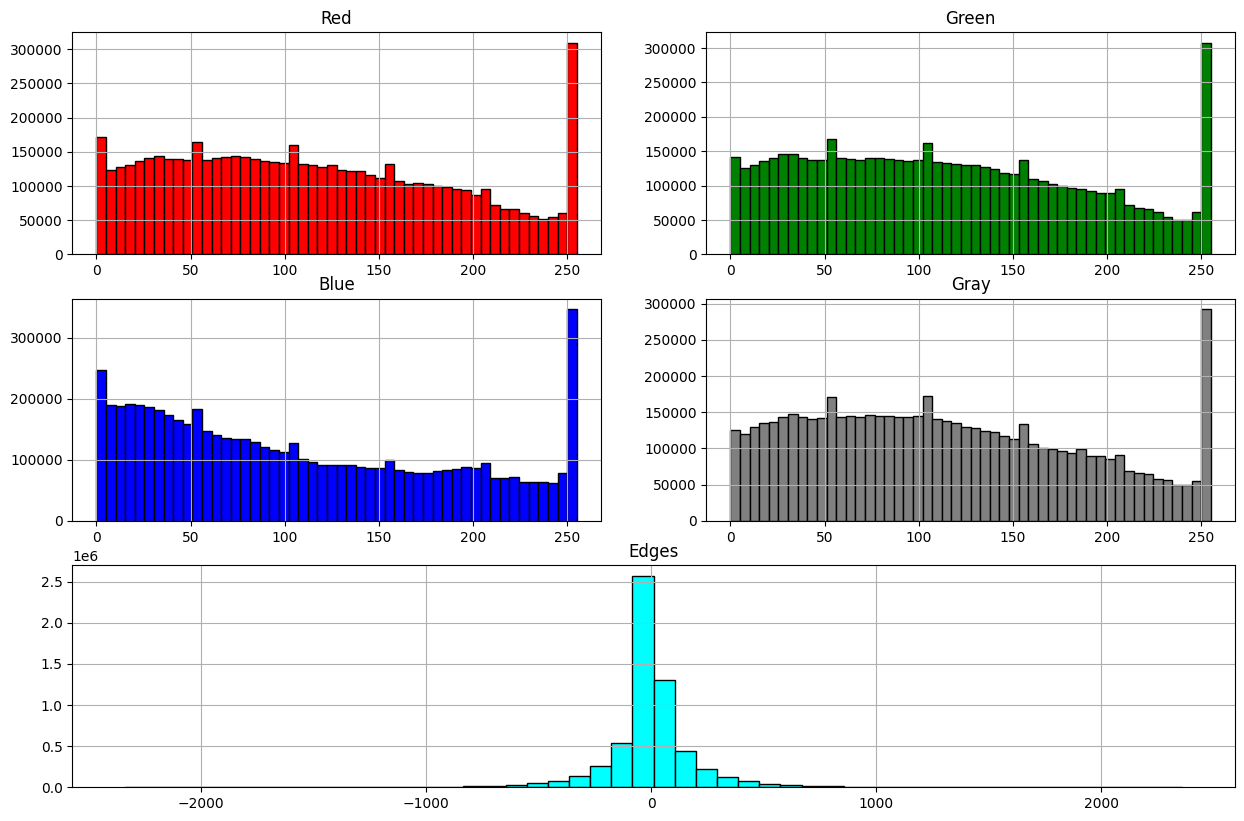

In [228]:
plt.figure(figsize=(15,10),dpi=100)
plt.subplot(3,2,1)
plt.hist(np.reshape(img_red,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='red')
plt.title('Red')
plt.grid()

plt.subplot(3,2,2)
plt.hist(np.reshape(img_gree,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='green')
plt.title('Green')
plt.grid()

plt.subplot(3,2,3)
plt.hist(np.reshape(img_blue,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='blue')
plt.title('Blue')
plt.grid()

plt.subplot(3,2,4)
plt.hist(np.reshape(img_gray,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='gray')
plt.title('Gray')
plt.grid()

plt.subplot(3,2,(5,6))
plt.hist(np.reshape(img_edges,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='cyan')
plt.title('Edges')
plt.grid()

plt.show()


We will use as `features` the red and gray colors

In [ ]:
feature = [img_red,img_gray]

## 1 - Present the components based on this dataset. 
Use Gaussian Mixture Models (GMMs) to solve this item;

In [161]:
from sklearn import mixture
data = np.reshape(feature,(-1,2))
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(data)
label = gmm.predict(data)

#https://moonbooks.org/Articles/How-to-use-a-Gaussian-mixture-model-GMM-with-sklearn-in-python-/

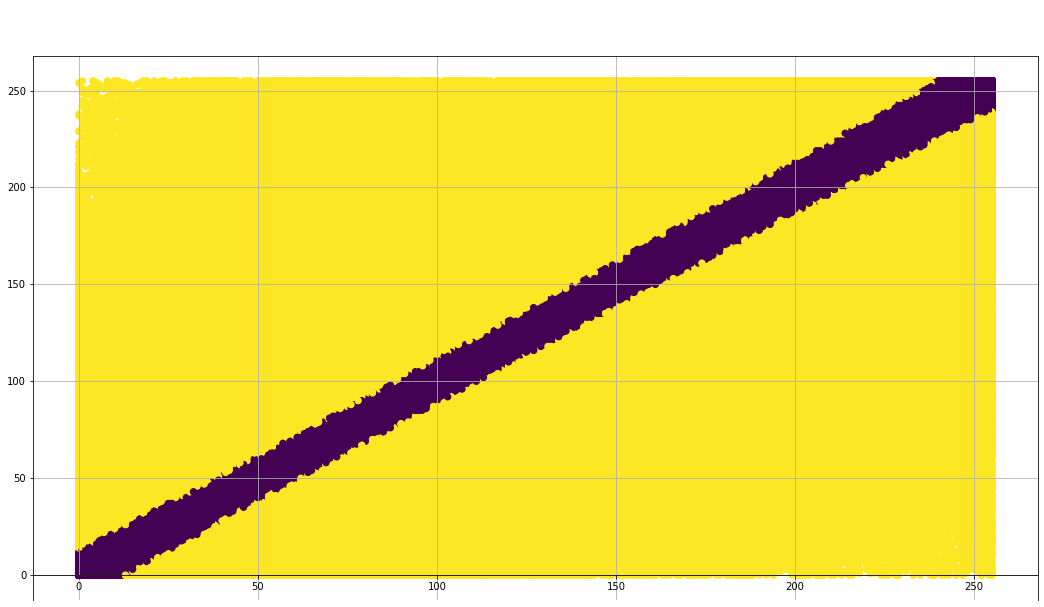

In [130]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(data[:,1], data[:,0], c=label,s=40)
#axs.hist(image_feature_3)

#Create labels 
axs.set_xlabel('', size=14)
axs.set_ylabel('', size=14)
axs.spines['bottom'].set_position('zero')

# set title
plt.title(' ', pad=30, size=25)
plt.grid()
plt.show()

## 2.1 Features means

Now let's calculate the average value of each feature of each image and generate these Gaussian separations for this data. The data is already planned

In [115]:
mean_red  = []
mean_gray = []
for i in range(len(img_red)):
  mean_red.append(np.mean(img_red[i]))
  mean_gray.append(np.mean(img_gray[i]))

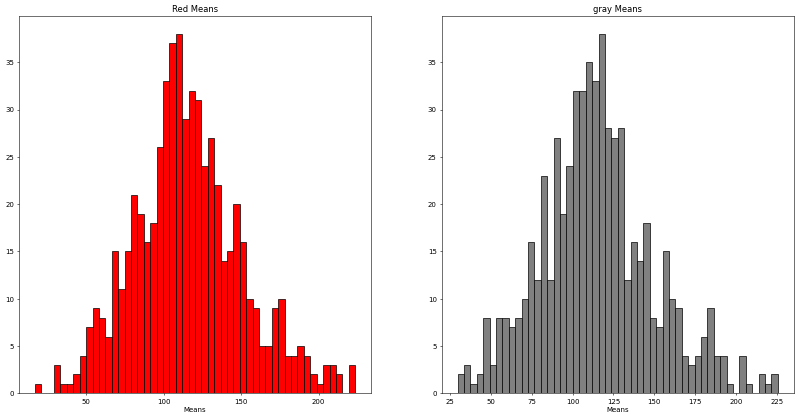

In [173]:
plt.figure(figsize=(20,10),dpi=50)

plt.subplot(1,2,1)
plt.hist(mean_red,bins=50,color='red', edgecolor="k",)
plt.title('Red Means')
plt.xlabel('Means')

plt.subplot(1,2,2)
plt.hist(mean_gray,bins=50,color='gray', edgecolor="k",)
plt.title('gray Means')
plt.xlabel('Means')
plt.show()

In [218]:
#All ready reshaped data
mean_feature = [mean_red,mean_gray]
mean_data = np.reshape(mean_feature,(-1,2))
mean_gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(mean_data)
mean_label = mean_gmm.predict(mean_data)


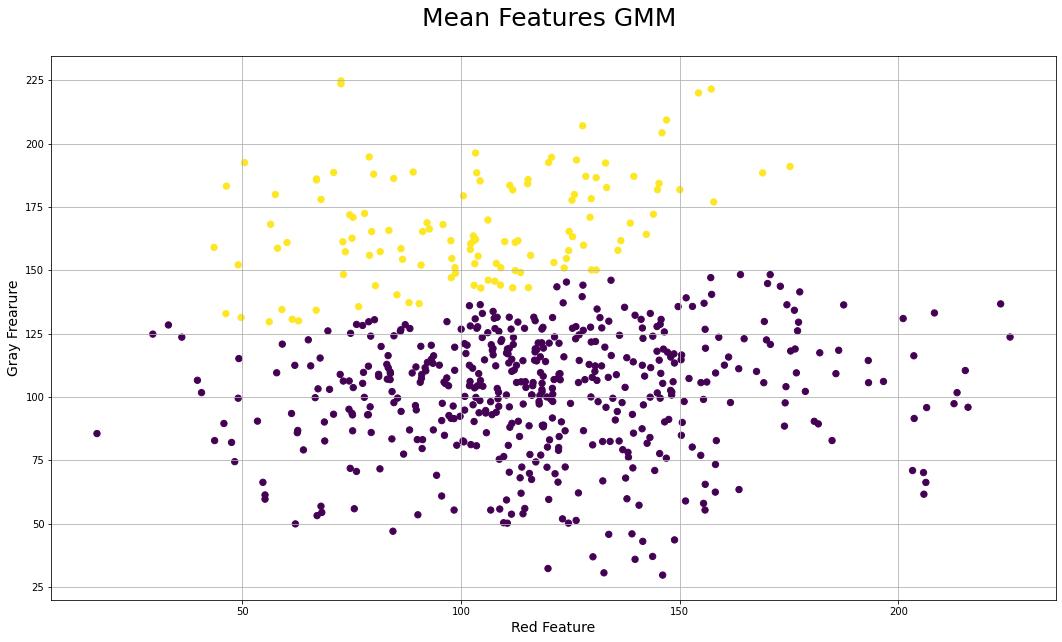

In [224]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))
axs.scatter(mean_data[:,0], mean_data[:,1], c=mean_label,s=40)
#axs.hist(image_feature_3)

#Create labels 
axs.set_xlabel('Red Feature', size=14)
axs.set_ylabel('Gray Frearure', size=14)
#axs.spines['bottom'].set_position('zero')

# set title
plt.title('Mean Features GMM ', pad=30, size=25)
plt.grid()
plt.show()

## 2 - Estimate the probability density function for each component you have found in the previous item. Show the plots. 
What is the best bandwidth in this case?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


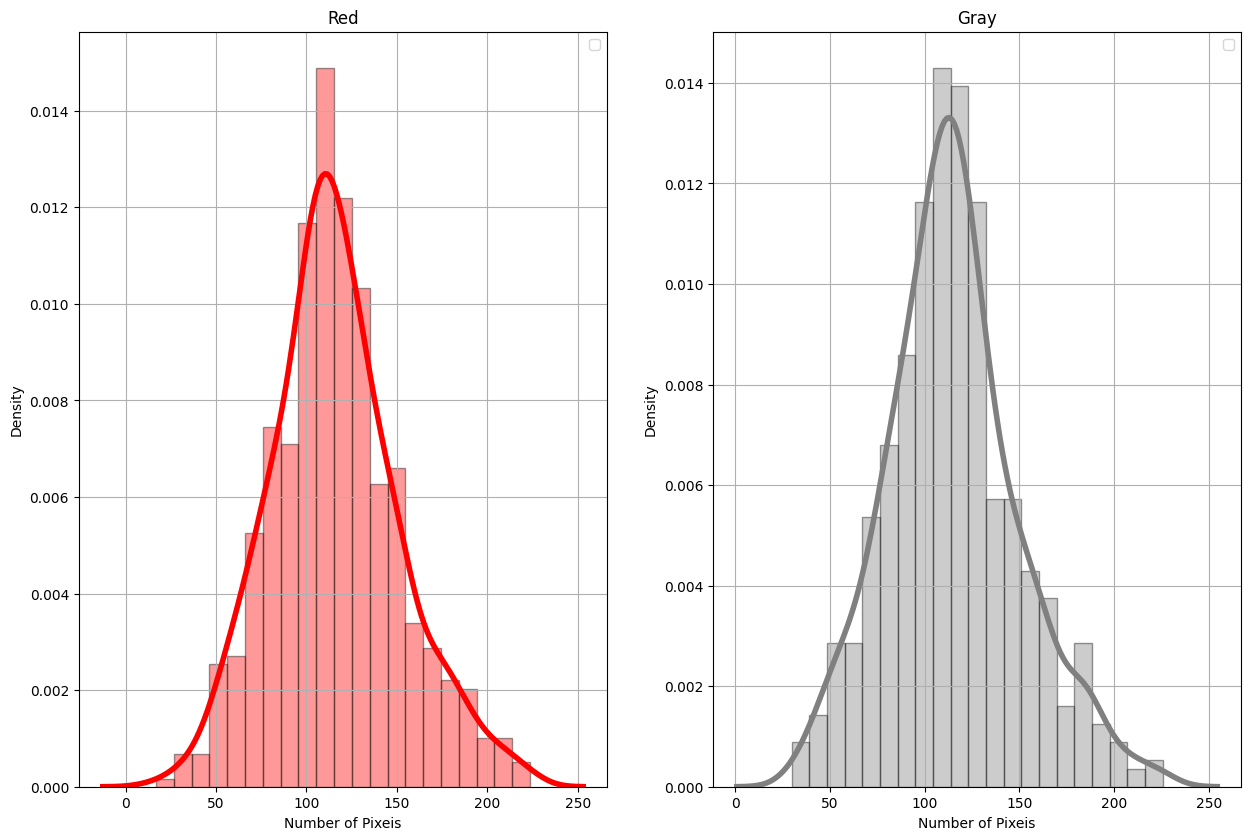

In [230]:
plt.figure(figsize=(15,10),dpi=100)

plt.subplot(1,2,1)
sns.distplot(mean_red, hist=True, kde=True, 
             color = 'Red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Red')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.distplot(mean_gray, hist=True, kde=True, 
             color = 'Gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Gray')
plt.legend()
plt.grid()



In [231]:
np.shape(mean_red)

(600,)

In [233]:
import statsmodels.api as sm
kde_cluster_0 = sm.nonparametric.KDEUnivariate(mean_red)
kde_cluster_0.fit()

kde_cluster_1 = sm.nonparametric.KDEUnivariate(mean_gray)
kde_cluster_1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


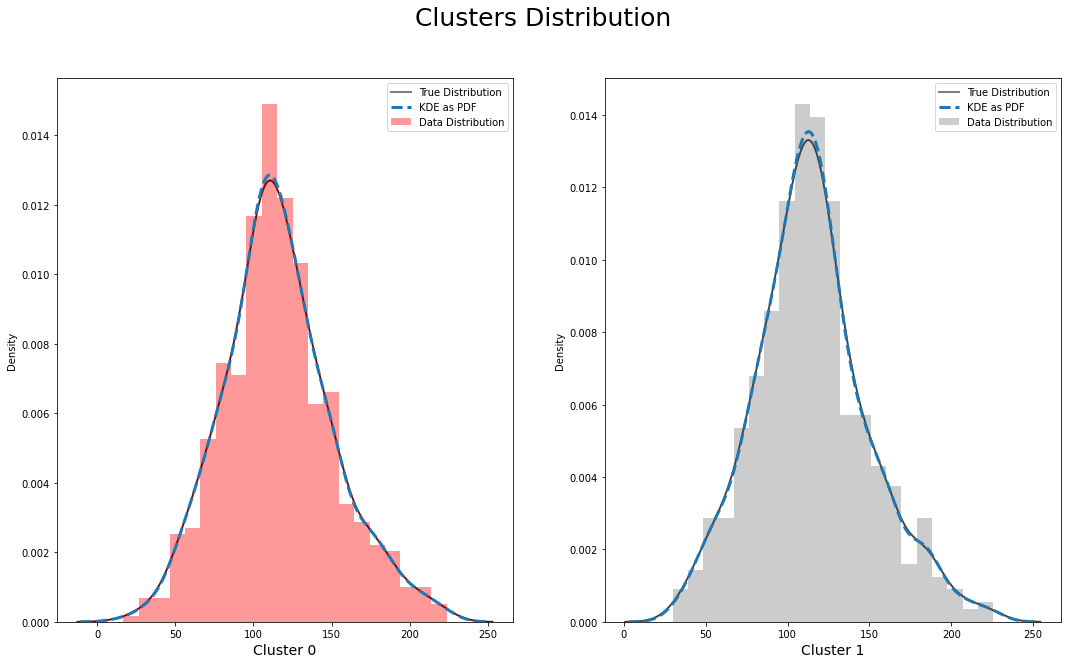

In [235]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Distribution', size=25)

# set data
sns.distplot(mean_red, ax=axs[0], kde=True,color='red', label="Data Distribution")
sns.kdeplot(mean_red, ax=axs[0], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[0].plot(kde_cluster_0.support, kde_cluster_0.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[0].set_xlabel("Cluster 0", size=14)
axs[0].legend()

sns.distplot(mean_gray, ax=axs[1], kde=True,color='gray', label="Data Distribution")
sns.kdeplot(mean_gray, ax=axs[1], label="True Distribution", common_grid=True, color='black', alpha=0.5, linewidth=2)
axs[1].plot(kde_cluster_1.support, kde_cluster_1.density, "--",lw=3, label="KDE as PDF", zorder=10)
axs[1].set_xlabel("Cluster 1", size=14)
axs[1].legend()

# set title
plt.legend()
plt.show()

In [ ]:
limport seaborn as sns
plt.figure(figsize=(15,10),dpi=100)


plt.subplot(2,2,1)
sns.distplot(img_red, hist=True, kde=True, 
             color = 'Red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Red')
plt.legend()
plt.grid()


plt.subplot(2,2,2)
sns.distplot(img_gree, hist=True, kde=True, 
             color = 'Green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Green')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
sns.distplot(img_blue, hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Blue')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
sns.distplot(img_gray, hist=True, kde=True, 
             color = 'Gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Gray')
plt.legend()
plt.grid()





## 3 - Estimate the probability density function for the entire dataset. 
* Show the plot. 
* What is the best bandwidth in this case?

In [ ]:

import numpy as np
import cv2


#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy



# Convert MxNx3 image into Kx3 where K=MxN
img2 = img[0].reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
cv2.imwrite("images/segmented.jpg", segmented)

In [ ]:
#Reading the data from github
df = pd.read_csv("https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Precipitation/precipitation.csv")

## 1 - Show that this dataset is normally distributed.

In [ ]:
#Creatin Figure Enveirment
figure(figsize=(10, 5), dpi=80)
plt.hist(df['Precipitation'],bins=20,color = 'darkblue')
plt.xlabel('Preciptation (mm)')
plt.ylabel('Occurrence')
plt.title('Precipatation Distribition')
plt.grid()
plt.show()

## 2 - Plot the raw data and also the pdf of this dataset.

In [ ]:
figure(figsize=(10, 5), dpi=80)
plt.subplot(1,2,1)
plt.scatter(df.Day,df.Precipitation)
plt.xlabel('Days')
plt.ylabel('Preciptation (mm)')
plt.title('Raw Data: Precipataion per Day')
plt.axhline(y=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.legend()
plt.grid()



plt.subplot(1,2,2)
sns.distplot(df['Precipitation'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(x=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.xlabel('Preciptation (mm)')
plt.ylabel('Density')
plt.title('Precipatation Distribition')
plt.legend()
plt.grid()


plt.show()
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## 3 - Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?

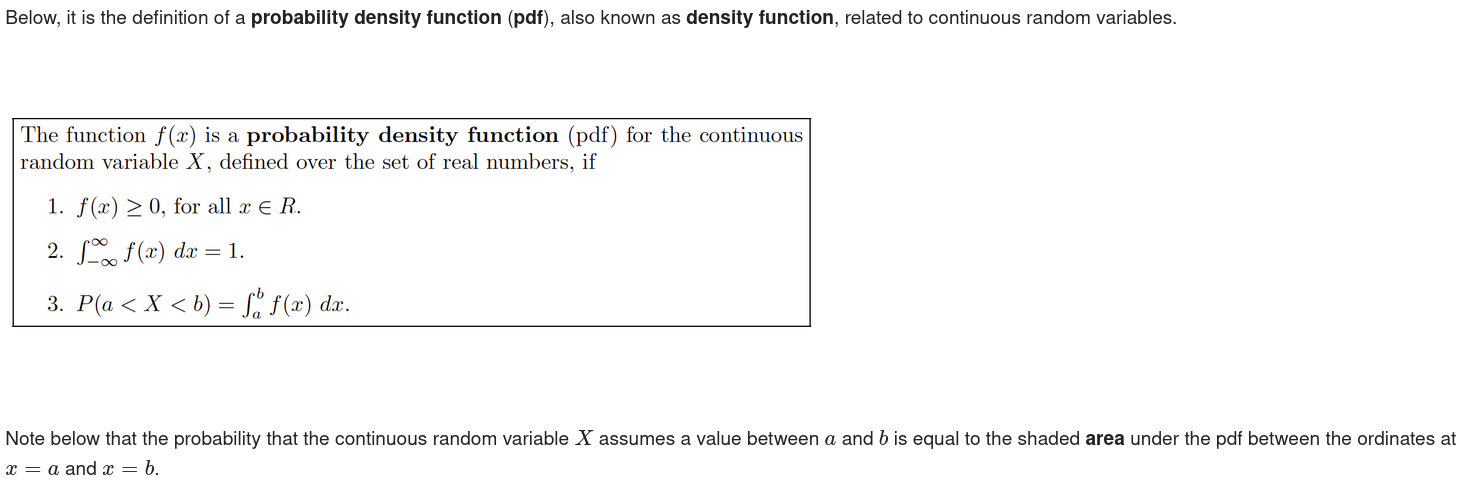

* If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

In [ ]:
#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition

# Intervals of Integrations
a,b = min(x),max(x)

# calculating P(a < x < b)
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)

#plot the area
figure(figsize=(10, 5), dpi=80)

# set data
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)

# for fill_between
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, color='darkblue', linewidth=2, label='Probability of '+str(prob*100)+'%')

#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()

As we can see, a complete area of the curvature in question represents a total of 100% probability, checking as a normal function

## 4 - What is the expected profit of this farm?

In [ ]:
#I use the calculus references used on the class
#https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb

def diff(x1, x2):
  mean1, std1 = mean, std
  cdf_x1,cdf_x2 = norm.cdf(x1,mean1,std1), norm.cdf(x2,mean1,std1)
  z1,z2 = (x1 - mean1)/std1, (x2 - mean1)/std1
  return norm.cdf(z2,0,1) - norm.cdf(z1,0,1)

print('{}% of R$ 50,000.00'.format(round((diff(47,round(max(x))))*100,2)))

print('{}% of R$ 100,000.00'.format(round((diff(30,47))*100,2)))
print('{}% of R$ 80,000.00'.format( round((diff(20,30))*100,2)))
print('{}% of R$ 35,000.00'.format( round((diff(10,20))*100,2)))
print('{}% of R$ -30,000.00'.format(round((diff(5,10))*100,2)))
print('{}% of R$ -50,000.00'.format(round((diff(5,0))*100,2)))


## EXTRA

Plotting the probability distribution for each rainfall interval

In [ ]:

#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition


figure(figsize=(10, 5), dpi=80)
#Pdf Curve
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)





# Intervals of Integrations
a,b = 20,30
px, y= np.arange(a, b, 0.01), norm.pdf(px, mean, std)
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='')


# # Intervals of Integrations
# a,b = 2 ,5
# px = np.arange(a, b, 0.01)
# y = norm.pdf(px, mean, std)
# prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
# axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')



# Intervals of Integrations
a,b = 5 ,10
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')




#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
case = [(2,5),(20,30)]

In [ ]:
f,j = case[0]

In [ ]:
f

# References

* [How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)
* [Image Feature Extraction: Traditional and Deep Learning Techniques](https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04)